In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import json
import csv
import copy


In [17]:
#initializing the files
finlandcsv = "samples/Finland_july25.csv"
polandcsv="samples/Poland_july25.csv"
belgiumcsv = "samples/Belgium_july25.csv"
spaincsv = "samples/Spain_july25.csv"
netherlandscsv = "samples/Netherlands_july25.csv"
switzerlandcsv = "samples/Switzerland_july25.csv"
germanycsv = "samples/Germany_july25.csv"

files = [finlandcsv, polandcsv, belgiumcsv, spaincsv, netherlandscsv, switzerlandcsv, germanycsv]
countryCode = ["FI", "PL", "BE", "ES", "NL", "CH", "DE"]
countries = ["Finland", "Poland", "Belgium", "Spain", "Netherlands", "Switzerland", "Germany"]


finlanddata = pd.DataFrame()
polanddata = pd.DataFrame()
belgiumdata = pd.DataFrame()
spaindata = pd.DataFrame()
netherlandsdata = pd.DataFrame()
switzerlanddata = pd.DataFrame()
germanydata = pd.DataFrame()

finlanddata_grouped = pd.DataFrame()
polanddata_grouped = pd.DataFrame()
belgiumdata_grouped = pd.DataFrame()
spaindata_grouped = pd.DataFrame()
netherlandsdata_grouped = pd.DataFrame()
switzerlanddata_grouped = pd.DataFrame()
germanydata_grouped = pd.DataFrame()

data = [finlanddata, polanddata, belgiumdata, spaindata, netherlandsdata, switzerlanddata, germanydata]
groupeddata = [finlanddata_grouped, polanddata_grouped, belgiumdata_grouped, spaindata_grouped, netherlandsdata_grouped,switzerlanddata_grouped, germanydata_grouped]

In [18]:
for index, file in enumerate(files): 
    # print(data[index])
    # print(file)
    data[index] = pd.read_csv(file)
    data[index] = data[index].iloc[: , 1:]
    data[index] = data[index].replace('n/e', 0)
    data[index] = data[index].replace('N/A', 0)
    data[index] = data[index].replace('-', 0)
  

for i, d in enumerate(data):
    data[i].columns = data[i].columns.str.strip()



In [19]:
#from Electricity Maps 
ENTSOE_PARAMETER_GROUPS = {
    "production": {
        "biomass": ["B01", "B17"],
        "coal": ["B02", "B05", "B07", "B08"],
        "gas": ["B03", "B04"],
        "geothermal": ["B09"],
        "hydro": ["B11", "B12"],
        "nuclear": ["B14"],
        "oil": ["B06"],
        "solar": ["B16"],
        "wind": ["B18", "B19"],
        "unknown": ["B20", "B13", "B15"],
    },
    "storage": {"hydro storage": ["B10"]},
}

#from Electricity Maps
ENTSOE_PARAMETER_DESC = {
    "B01": "Biomass", 
    "B02": "Fossil Brown coal/Lignite",
    "B03": "Fossil Coal-derived gas", 
    "B04": "Fossil Gas", 
    "B05": "Fossil Hard coal", 
    "B06": "Fossil Oil",
    "B07": "Fossil Oil shale", 
    "B08": "Fossil Peat", 
    "B09": "Geothermal", 
    "B10": "Hydro Pumped Storage", 
    "B11": "Hydro Run-of-river and poundage", 
    "B12": "Hydro Water Reservoir", 
    "B13": "Marine",
    "B14": "Nuclear",
    "B15": "Other renewable",
    "B16": "Solar",
    "B17": "Waste", 
    "B18": "Wind Offshore",
    "B19": "Wind Onshore",
    "B20": "Other",
}

for column in data[1].columns: 
    print(column)

MTU
Biomass  - Actual Aggregated [MW]
Fossil Brown coal/Lignite  - Actual Aggregated [MW]
Fossil Coal-derived gas  - Actual Aggregated [MW]
Fossil Gas  - Actual Aggregated [MW]
Fossil Hard coal  - Actual Aggregated [MW]
Fossil Oil  - Actual Aggregated [MW]
Fossil Oil shale  - Actual Aggregated [MW]
Fossil Peat  - Actual Aggregated [MW]
Geothermal  - Actual Aggregated [MW]
Hydro Pumped Storage  - Actual Aggregated [MW]
Hydro Pumped Storage  - Actual Consumption [MW]
Hydro Run-of-river and poundage  - Actual Aggregated [MW]
Hydro Water Reservoir  - Actual Aggregated [MW]
Marine  - Actual Aggregated [MW]
Nuclear  - Actual Aggregated [MW]
Other  - Actual Aggregated [MW]
Other renewable  - Actual Aggregated [MW]
Solar  - Actual Aggregated [MW]
Waste  - Actual Aggregated [MW]
Wind Offshore  - Actual Aggregated [MW]
Wind Onshore  - Actual Aggregated [MW]


In [20]:
data[0].head()

,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],Geothermal - Actual Aggregated [MW],...,Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
0,25.07.2022 00:00 - 25.07.2022 01:00 (CET/CEST),639,0,0,202,27,0,0,89,0,...,1129,0,0,2691,39,3,0,22,0,280
1,25.07.2022 01:00 - 25.07.2022 02:00 (CET/CEST),642,0,0,191,27,0,0,80,0,...,779,0,0,2692,39,3,0,22,0,275
2,25.07.2022 02:00 - 25.07.2022 03:00 (CET/CEST),642,0,0,198,27,0,0,64,0,...,748,0,0,2691,40,3,0,22,0,299
3,25.07.2022 03:00 - 25.07.2022 04:00 (CET/CEST),632,0,0,213,27,0,0,66,0,...,700,0,0,2693,42,3,0,22,0,404
4,25.07.2022 04:00 - 25.07.2022 05:00 (CET/CEST),639,0,0,164,27,0,0,62,0,...,774,0,0,2692,41,3,0,22,0,541


In [21]:

# groupeddata[index] = pd.DataFrame()

for index, d in enumerate(data): 

    biomass = data[index]["Biomass  - Actual Aggregated [MW]"] + data[index]["Waste  - Actual Aggregated [MW]"]
    coal = data[index]["Fossil Brown coal/Lignite  - Actual Aggregated [MW]"] + data[index]["Fossil Hard coal  - Actual Aggregated [MW]"] + data[index]["Fossil Oil shale  - Actual Aggregated [MW]"] + data[index]["Fossil Peat  - Actual Aggregated [MW]"]
    gas = data[index]["Fossil Coal-derived gas  - Actual Aggregated [MW]"] + data[index]["Fossil Gas  - Actual Aggregated [MW]"]
    geo = data[index]["Geothermal  - Actual Aggregated [MW]"]
    hydro = data[index]["Hydro Run-of-river and poundage  - Actual Aggregated [MW]"] + data[index]["Hydro Water Reservoir  - Actual Aggregated [MW]"]

    nuclear = data[index]["Nuclear  - Actual Aggregated [MW]"]
    oil = data[index]["Fossil Oil  - Actual Aggregated [MW]"]
    solar = data[index]["Solar  - Actual Aggregated [MW]"]
    wind = data[index]["Wind Offshore  - Actual Aggregated [MW]"] + data[index]["Wind Onshore  - Actual Aggregated [MW]"]
    other = data[index]["Other  - Actual Aggregated [MW]"] + data[index]["Other renewable  - Actual Aggregated [MW]"] + data[index]["Marine  - Actual Aggregated [MW]"]


    groupeddata[index]["Biomass"] = biomass.astype('float64')
    groupeddata[index]["Coal"] = coal.astype('float64')
    groupeddata[index]["Gas"] = gas.astype('float64')
    groupeddata[index]["Geothermal"] = geo.astype('float64')
    groupeddata[index]["Hydro"] = hydro.astype('float64')
    groupeddata[index]["Nuclear"] = nuclear.astype('float64')
    groupeddata[index]["Oil"] = oil.astype('float64') 
    groupeddata[index]["Solar"] = solar.astype('float64')
    groupeddata[index]["Wind"] = wind.astype('float64')
    groupeddata[index]["Other"] = other.astype('float64')


In [22]:
finlanddata_grouped

,Biomass,Coal,Gas,Geothermal,Hydro,Nuclear,Oil,Solar,Wind,Other
0,661.0,116.0,202.0,0.0,1129.0,2691.0,0.0,0.0,280.0,42.0
1,664.0,107.0,191.0,0.0,779.0,2692.0,0.0,0.0,275.0,42.0
2,664.0,91.0,198.0,0.0,748.0,2691.0,0.0,0.0,299.0,43.0
3,654.0,93.0,213.0,0.0,700.0,2693.0,0.0,0.0,404.0,45.0
4,661.0,89.0,164.0,0.0,774.0,2692.0,0.0,0.0,541.0,44.0
5,657.0,103.0,150.0,0.0,1083.0,2691.0,0.0,0.0,591.0,40.0
6,669.0,120.0,172.0,0.0,1570.0,2691.0,0.0,0.0,634.0,35.0
7,667.0,116.0,179.0,0.0,1873.0,2691.0,0.0,0.0,473.0,28.0
8,669.0,119.0,193.0,0.0,2047.0,2694.0,1.0,0.0,300.0,25.0
9,663.0,118.0,192.0,0.0,1929.0,2692.0,0.0,0.0,431.0,23.0


In [23]:
#total kWH

#the columns are in MWH
columns = ["Biomass", "Coal", "Gas", "Geothermal", "Hydro", "Nuclear", "Oil", "Solar", "Wind", "Other"]
for newdata in groupeddata:
    newdata['Total kWH'] = newdata[columns].sum(axis=1, numeric_only=True) * 1000


finlanddata_grouped

,Biomass,Coal,Gas,Geothermal,Hydro,Nuclear,Oil,Solar,Wind,Other,Total kWH
0,661.0,116.0,202.0,0.0,1129.0,2691.0,0.0,0.0,280.0,42.0,5121000.0
1,664.0,107.0,191.0,0.0,779.0,2692.0,0.0,0.0,275.0,42.0,4750000.0
2,664.0,91.0,198.0,0.0,748.0,2691.0,0.0,0.0,299.0,43.0,4734000.0
3,654.0,93.0,213.0,0.0,700.0,2693.0,0.0,0.0,404.0,45.0,4802000.0
4,661.0,89.0,164.0,0.0,774.0,2692.0,0.0,0.0,541.0,44.0,4965000.0
5,657.0,103.0,150.0,0.0,1083.0,2691.0,0.0,0.0,591.0,40.0,5315000.0
6,669.0,120.0,172.0,0.0,1570.0,2691.0,0.0,0.0,634.0,35.0,5891000.0
7,667.0,116.0,179.0,0.0,1873.0,2691.0,0.0,0.0,473.0,28.0,6027000.0
8,669.0,119.0,193.0,0.0,2047.0,2694.0,1.0,0.0,300.0,25.0,6048000.0
9,663.0,118.0,192.0,0.0,1929.0,2692.0,0.0,0.0,431.0,23.0,6048000.0


In [24]:
#Emission Factor in terms of kWh
emissionFactorFile = "emissionFactors.json"
file = open(emissionFactorFile,'r') 
emissionJSON = json.load(file)

defaultDict = emissionJSON['emissionFactors']['defaults']
sources = defaultDict.keys() #list of sources 

#if there are multiple available mean values, use the last one (index -1)

# defaultDict["battery discharge"][-1]['value']
defaultVal = dict()
for source in sources: 
    try: 
        defaultVal[source] = defaultDict[source]['value']
        # print(source, defaultDict[source]['value'])
    except: 
        defaultVal[source] = defaultDict[source][-1]['value']
        # print(source, defaultDict[source][-1]["value"])
defaultVal


{'battery charge': 0,
 'battery discharge': 391.33,
 'biomass': 230,
 'coal': 820,
 'gas': 490,
 'geothermal': 38,
 'hydro': 24,
 'hydro charge': 0,
 'hydro discharge': 391.33,
 'nuclear': 12,
 'oil': 650,
 'solar': 45,
 'unknown': 700,
 'wind': 11}

In [25]:
#overriding defaults value 

overrideDict = emissionJSON['emissionFactors']['zoneOverrides']
newOverrideDict = dict()
for index, countrycode in enumerate(countryCode):
    
    countryFactors = copy.deepcopy(defaultVal)
    # print("before update",countrycode,countryFactors)

    # print(countryFactors
    overrideFactors = overrideDict[countrycode].keys()
    for newfactor in overrideFactors:
        # print(newfactor, overrideDict[countrycode][newfactor][-1]['value'])
        try:
            countryFactors[newfactor] = overrideDict[countrycode][newfactor][-1]['value']
        except: 
            countryFactors[newfactor] = overrideDict[countrycode][newfactor]['value']
    newOverrideDict[countries[index]] = countryFactors
    # print("after update",countryFactors)
    # print(countries[index],overrideFactors)

# for factor in overrideFactors: 
#     try 

In [26]:
newOverrideDict

{'Finland': {'battery charge': 0,
  'battery discharge': 166.39907984629133,
  'biomass': 230,
  'coal': 820,
  'gas': 490,
  'geothermal': 38,
  'hydro': 24,
  'hydro charge': 0,
  'hydro discharge': 166.39907984629133,
  'nuclear': 12,
  'oil': 650,
  'solar': 45,
  'unknown': 700,
  'wind': 11},
 'Poland': {'battery charge': 0,
  'battery discharge': 639.8938589446889,
  'biomass': 230,
  'coal': 820,
  'gas': 490,
  'geothermal': 38,
  'hydro': 24,
  'hydro charge': 0,
  'hydro discharge': 639.8938589446889,
  'nuclear': 12,
  'oil': 650,
  'solar': 45,
  'unknown': 700,
  'wind': 11},
 'Belgium': {'battery charge': 0,
  'battery discharge': 144.20803925394276,
  'biomass': 230,
  'coal': 820,
  'gas': 490,
  'geothermal': 38,
  'hydro': 24,
  'hydro charge': 0,
  'hydro discharge': 144.20803925394276,
  'nuclear': 12,
  'oil': 650,
  'solar': 45,
  'unknown': 700,
  'wind': 11},
 'Spain': {'battery charge': 0,
  'battery discharge': 123.85360346149422,
  'biomass': 230,
  'coal': 

In [27]:
# eveything in MWH, so convert everything to kWH

#Co2eq
for index, newdata in enumerate(groupeddata):

    newdata["Biomass"] = newOverrideDict[countries[index]]['biomass'] * newdata["Biomass"] * 1000
    newdata["Coal"] = newOverrideDict[countries[index]]['coal'] * newdata["Coal"] * 1000
    newdata["Gas"] = newOverrideDict[countries[index]]['gas'] * newdata["Gas"] * 1000
    newdata["Geothermal"] = newOverrideDict[countries[index]]['geothermal'] * newdata["Geothermal"]  * 1000
    newdata["Hydro"] = newOverrideDict[countries[index]]['hydro'] * newdata["Hydro"] * 1000
    newdata["Nuclear"] = newOverrideDict[countries[index]]['nuclear'] * newdata["Nuclear"] * 1000
    newdata["Oil"] = newOverrideDict[countries[index]]['oil'] * newdata["Oil"] * 1000
    newdata["Solar"] = newOverrideDict[countries[index]]['solar'] * newdata["Solar"] * 1000
    newdata["Wind"] = newOverrideDict[countries[index]]['wind'] * newdata["Wind"] * 1000
    newdata["Other"] = newOverrideDict[countries[index]]['unknown'] * newdata["Other"] * 1000




# polanddata_grouped


In [28]:
#total CO2eq

columns = ["Biomass", "Coal", "Gas", "Geothermal", "Hydro", "Nuclear", "Oil", "Solar", "Wind", "Other"]
for newdata in groupeddata:
    newdata['Total CO2eq'] = newdata[columns].sum(axis=1, numeric_only=True)
    

polanddata_grouped

,Biomass,Coal,Gas,Geothermal,Hydro,Nuclear,Oil,Solar,Wind,Other,Total kWH,Total CO2eq
0,56810000.0,9.194660e+09,389550000.0,0.0,2304000.0,0.0,117650000.0,0.0,8756000.0,0.0,13328000.0,9.769730e+09
1,57270000.0,8.941280e+09,364560000.0,0.0,2304000.0,0.0,117650000.0,0.0,12650000.0,0.0,13324000.0,9.495714e+09
2,57040000.0,8.696920e+09,351330000.0,0.0,2304000.0,0.0,117650000.0,0.0,15191000.0,0.0,13229000.0,9.240435e+09
3,57270000.0,8.578020e+09,353290000.0,0.0,2304000.0,0.0,117000000.0,0.0,18249000.0,0.0,13366000.0,9.126133e+09
4,57040000.0,8.420580e+09,336630000.0,0.0,2304000.0,0.0,117650000.0,180000.0,20361000.0,0.0,13336000.0,8.954745e+09
5,56810000.0,8.650180e+09,325850000.0,0.0,2304000.0,0.0,117000000.0,5175000.0,20768000.0,0.0,13740000.0,9.178087e+09
6,55660000.0,1.007698e+10,323400000.0,0.0,2280000.0,0.0,117650000.0,26595000.0,19008000.0,0.0,15786000.0,1.062157e+10
7,52670000.0,1.097242e+10,336630000.0,0.0,2280000.0,0.0,117650000.0,86760000.0,12738000.0,0.0,17659000.0,1.158115e+10
8,52440000.0,1.119300e+10,339080000.0,0.0,2400000.0,0.0,117000000.0,157410000.0,7018000.0,0.0,18986000.0,1.186835e+10
9,52440000.0,1.082892e+10,335160000.0,0.0,2616000.0,0.0,117650000.0,213570000.0,7414000.0,0.0,19828000.0,1.155777e+10


In [29]:
#Average Carbon intensity
columns = ["Biomass", "Coal", "Gas", "Geothermal", "Hydro", "Nuclear", "Oil", "Solar", "Wind", "Other"]
for newdata in groupeddata: 
    newdata['Average'] = newdata['Total CO2eq'] / newdata['Total kWH']

belgiumdata_grouped

,Biomass,Coal,Gas,Geothermal,Hydro,Nuclear,Oil,Solar,Wind,Other,Total kWH,Total CO2eq,Average
0,99820000.0,0.0,1.112790e+09,0.0,0.0,45660000.0,0.0,0.0,3916000.0,NaN,6866000.0,1.262186e+09,183.831343
1,100280000.0,0.0,9.295300e+08,0.0,0.0,45744000.0,0.0,0.0,5698000.0,NaN,6663000.0,1.081252e+09,162.277052
2,100050000.0,0.0,8.521100e+08,0.0,0.0,45828000.0,0.0,0.0,9207000.0,NaN,6830000.0,1.007195e+09,147.466325
3,99360000.0,0.0,8.467200e+08,0.0,0.0,45816000.0,0.0,0.0,12056000.0,NaN,7074000.0,1.003952e+09,141.921402
4,100510000.0,0.0,8.388800e+08,0.0,0.0,45828000.0,0.0,0.0,16390000.0,NaN,7458000.0,1.001608e+09,134.299812
5,100050000.0,0.0,8.991500e+08,0.0,0.0,45924000.0,0.0,0.0,19217000.0,NaN,7844000.0,1.064341e+09,135.688552
6,98670000.0,0.0,1.086820e+09,0.0,0.0,45960000.0,0.0,3600000.0,16709000.0,NaN,8076000.0,1.251759e+09,154.997400
7,100740000.0,0.0,1.122590e+09,0.0,0.0,45972000.0,0.0,16650000.0,18447000.0,NaN,8607000.0,1.304399e+09,151.550947
8,97980000.0,0.0,1.096620e+09,0.0,0.0,46116000.0,0.0,39600000.0,20999000.0,NaN,9296000.0,1.301315e+09,139.986553
9,99130000.0,0.0,9.961700e+08,0.0,0.0,46164000.0,0.0,81495000.0,20405000.0,NaN,9977000.0,1.243364e+09,124.623033


In [30]:
ticks = []
for i in range(24): 
    ticks.append(i)

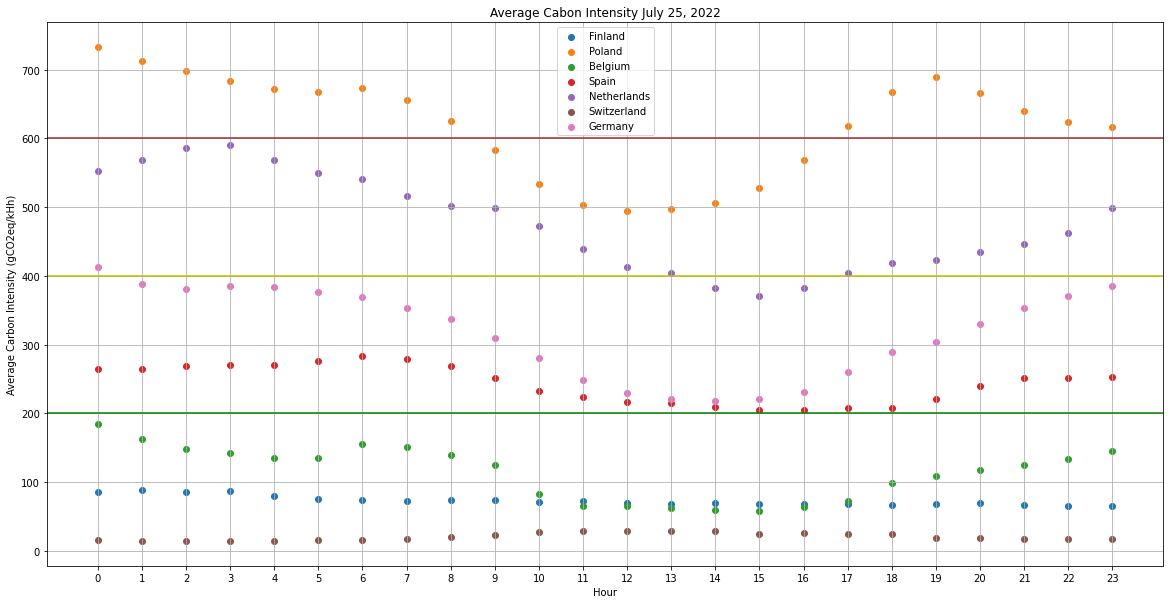

In [31]:
#everything 
plt.figure(figsize=(20,10))
for newdata in groupeddata:
   
    plt.scatter(ticks, newdata['Average'])
plt.axhline(y=200, xmin=0, xmax=23, color='g')
plt.axhline(y=400, xmin=0, xmax=23, color='y')
plt.axhline(y=600, xmin=0, xmax=23, color='brown')
plt.legend(countries)
plt.grid()
plt.xticks(ticks)
plt.title("Average Cabon Intensity July 25, 2022")
plt.ylabel("Average Carbon Intensity (gCO2eq/kHh)")
plt.xlabel("Hour")
plt.show()
